In [116]:
pip install missingno missingpy # ESTO SE DEBE INSTALAR EN LA TERMINAL

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [170]:
# IMPORTAR LIBRERÍAS NECESARIAS
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [118]:
# CREAR EL DATAFRAME CON PANDAS
df = pd.read_csv("/workspaces/cathycaz-intro-ml/data/raw/internal-link.csv")
# CON ESTE CÓDIGO SE IMPORTA EL DOCUMENTO CON FORMATO CSV
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [119]:
# ESTABLECER EL ID COMO ÍNDICE
df.set_index("id", inplace=True) # CON ESTE CÓDIGO ESTABLEZCO LA COLUMNA QUE YO DESEE COMO ÍNDICE (EN ESTE CASO LA COLUMNA "id")
pd.set_option('display.max_columns', None) # ESTO SIRVE PARA QUE ME MUESTRE TODAS LAS COLUMNAS CUANDO UN DATAFRAME ES MUY ANCHO O CON MUCHAS COLUMNAS 
# CON EL (None) LE DIGO QUE ME MUESTRE TODAS LAS COLUMNAS SIN LIMITACIÓN
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [120]:
# INFORMACIÓN DE LA TABLA
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

In [121]:
# COMPROBACION DE CUANTOS VALORES DISTINTOS HAY EN CADA COLUMNA
unicos = df.nunique() # Cuenta cuántos valores distintos hay en cada columna del DataFrame y guarda ese conteo en unicos
unicos

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [122]:
# AHORA MOSTRAMOS LAS COLUMNAS QUE TENGAN UN SOLO VALOR
df[unicos[unicos==1].index]  # Muestra las columnas que tienen un solo valor único
# NO HAY COLUMNAS CON UN SOLO VALOR

""
id
2539
2595
3647
3831
5022
...
36484665
36485057
36485431


SI HUBIESEN COLUMNAS CON DATOS UNICOS APLICAMOS ESTA FÓRMULA

df.drop(unicos[unicos==1].index, axis=1, inplace=True)

In [123]:
# COMPROBACIÓN DE DATOS DUPLICADOS EN TODAS LAS FILAS POR DEFECTO
df.duplicated().sum()
# NO HAY FILAS DUPLICADAS

np.int64(0)

In [124]:
# AUNQUE SABEMOS QUE NO HAY VALORES DIPLICADOS CON ESTE CÓDIGO PUEDO GENERAR UNA TABLA CON TRUE Y FALSE (TRUE FILAS CON DATOS DUPLICADOS Y FALSE FILAS SIN DATOS DUPLICADOS)
df.duplicated(keep=False) 

id
2539        False
2595        False
3647        False
3831        False
5022        False
            ...  
36484665    False
36485057    False
36485431    False
36485609    False
36487245    False
Length: 48895, dtype: bool

SI HUBIESE DATOS DUPLICADOS EN LAS FILAS PODEMOS APLICAR ESTA FÓRMULA PARA ELIMINARLAS 

- Eliminar duplicados por todas las columnas:

df_clean = df.drop_duplicates(keep='first')

- Modificar el DataFrame en su sitio:

df.drop_duplicates(keep='first', inplace=True)

In [125]:
# COMPROBACIÓN DE DATOS DUPLICADOS EN (COLUMNAS DE LAS DATA ORIGINAL) QUE CON LA TRANSPUESTA LAS CONVERTIMOS EN FILAS 
df.T.duplicated().sum()
# NO HAY FILAS DUPLICADAS EN LA TRANSPUESTA

np.int64(0)

In [126]:
# AUNQUE SABEMOS QUE NO HAY VALORES DIPLICADOS CON ESTE CÓDIGO PUEDO GENERAR UNA TABLA CON TRUE Y FALSE (TRUE FILAS CON DATOS DUPLICADOS Y FALSE FILAS SIN DATOS DUPLICADOS)
df.T.duplicated(keep=False) 

name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

EN ESTE CASO NO HAY DATOS DUPLICADOS, PERO SI ENCONTRAMOS DATOS DUPLICADOS EN UNA COLUMNA APLICAMOS ESTO 

df.drop('nombre de la columna', axis=1, inplace=True)

In [127]:
#ELIMINAR COLUMNAS QUE NO APORTAN INFORMACIÓN IMPORTANTE O SON REDUNDANTES
# PRIMERO VERIFICO 
# host_name POR host_id
host_name_por_id = df.groupby('host_id')['host_name'].nunique() # ESTO ME GENERA UN GROUPBY Y ME INDICA LOS VALORES UNICOS 
print("host_id con host_name >1 :", (host_name_por_id > 1).sum())

host_id con host_name >1 : 0


In [128]:
#ELIMINAR COLUMNAS QUE NO APORTAN INFORMACIÓN IMPORTANTE O SON REDUNDANTES
# PRIMERO VERIFICO 
# name POR id
id_name = df.groupby('id')['name'].nunique()
print("id con name >1 :", (id_name > 1).sum())

id con name >1 : 0


In [129]:
# GENERAMOS TABLA PARA VISUALIZARLO MEJOR
df.groupby('host_id')['host_name'].nunique()

host_id
2438         1
2571         1
2787         1
2845         1
2868         1
            ..
274273284    1
274298453    1
274307600    1
274311461    1
274321313    1
Name: host_name, Length: 37457, dtype: int64

In [130]:
# GENERAMOS TABBLA PARA VISUALIZARLO MEJOR
df.groupby('id')['name'].nunique()

id
2539        1
2595        1
3647        1
3831        1
5022        1
           ..
36484665    1
36485057    1
36485431    1
36485609    1
36487245    1
Name: name, Length: 48895, dtype: int64

In [131]:
# CON EL LENGTH DEL GROUPBY HOST_ID CON NAME (LENGTH: 37457) INTUIMOS QUE UN IDENTIFICADOR PUEDE TENER VARIAS PROPIEDADES (name)
# ENTONCES CONTAMOS LOS HOST_ID...
df['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
32045          1
7355           1
45445          1
24680832       1
274035866      1
Name: count, Length: 37457, dtype: int64

EMPEZAMOS A DIVIDIR POR CANTIDAD DE PROPIEDADES PARA IDENTIFICAR EL PORCENTAJE DE PROPORCIÓN Y TOMAR UNA DECISIÓN 

In [132]:
# LO METEMOS EN UNA VARIABLE PARA VERIFICAR CUANTAS PROPIEDADES TIENE CADA HOST ID EN PORCENTAJES
pisos=df['host_id'].value_counts()
pisos[pisos==1].count()/pisos.count()*100
# EL 86 % DE LOS HOST_ID TIENEN UNA SOLA PROPIEDAD (NAME)

np.float64(86.24022212136583)

In [133]:
# LO METEMOS EN UNA VARIABLE PARA VERIFICAR CUANTAS PROPIEDADES TIENE CADA HOST ID EN PORCENTAJES
pisos=df['host_id'].value_counts()
pisos[pisos==2].count()/pisos.count()*100
# CASI EL 9 % DE LOS HOST_ID TIENEN DOS PROPIEDADES (NAME)

np.float64(8.887524361267587)

In [134]:
# LO METEMOS EN UNA VARIABLE PARA VERIFICAR CUANTAS PROPIEDADES TIENE CADA HOST ID EN PORCENTAJES
pisos=df['host_id'].value_counts()
pisos[pisos==3].count()/pisos.count()*100
# CASI EL 3 % DE LOS HOST_ID TIENEN TRES PROPIEDADES (NAME)

np.float64(2.5389112849400646)

CON ESTO SE PUEDE CONCLUIR QUE PODEMOS ESTABLECER UNA NUEVA COLUMNA CON SOLO DOS INDICADORES SEGÚN EL NÚMERO DE PROPIEDADES POR HOST_ID Y ASI VAMOS NORMALIZANDO VALORES 

In [135]:
# HACEMOS UN MAPEO POR LA COLUMNA HOST_ID PARA LUEGO INSERTAR UNA NUEVA COLUMNA CON LOS INDICADORES QUE QUEREMOS
# ESCOGEMOS COMO PROFESINALES A LOS PROPIETARIOS CON 2 O MAS PROPIEDADES EN ALQUILER Y LE ASIGNAMOS EL VALOR 1
# Y A LOS QUE TIENEN UNA SOLA PROPIEDAD LE ASIGNAMOS EL VALOR 0
pisos=df['host_id'].value_counts()
indicator1 = df['host_id'].map(lambda x: 1 if pisos.get(x, 0) >= 2 else 0)

In [136]:
# LOCALIZAR LA POSICION DE HOST ID PARA METER LA COLUMNA NUEVA JUSTO DESPUES DE ELLA PARA HOST PROFESIONALES
posicion = df.columns.get_loc('host_id')
df.insert(posicion+1, 'host_pro', indicator1)

In [137]:
# COMPROBAMOS LA TABLA CON LA NUEVA COLUMNA
df.head()

,name,host_id,host_pro,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,1,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [138]:
# AHORA PODEMOS ELIMINAR HOST NAME Y DEJAMOS HOTS ID
df.drop(['host_name'], axis=1, inplace=True)

In [139]:
# ELIMINAMOS NAME Y DEJAMOS ID
df.drop(['name'], axis=1, inplace=True)

In [140]:
# NUEVO DATAFRAME SIN LA COLUMNA HOST_NAME NI NAME
df.head()

,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
2539,2787,1,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,0,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,0,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,0,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [141]:
# DATOS FALTANTES EN NUMEROS 
df.isnull().sum()

host_id                               0
host_pro                              0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [142]:
# DATOS FALTANTES EN PORCENTAJE
df.isnull().mean()*100

host_id                            0.000000
host_pro                           0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [143]:
# COMPROBAR LOS DATOS CON FILAS QUE TIENEN DATOS NULOS MAYORES A 2
n = 2
df[df.isnull().sum(axis=1) ==n]

,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
3647,4632,0,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
7750,17985,1,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
8700,26394,0,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
11452,7355,0,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
11943,45445,0,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,8232441,1,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
36485057,6570630,1,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
36485431,23492952,0,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


ESTO EXACTAMENTE COINCIDE CON LAS 2 UNICAS COLUMNAS QUE TIENEN DATOS FALTANTES!

<Axes: >

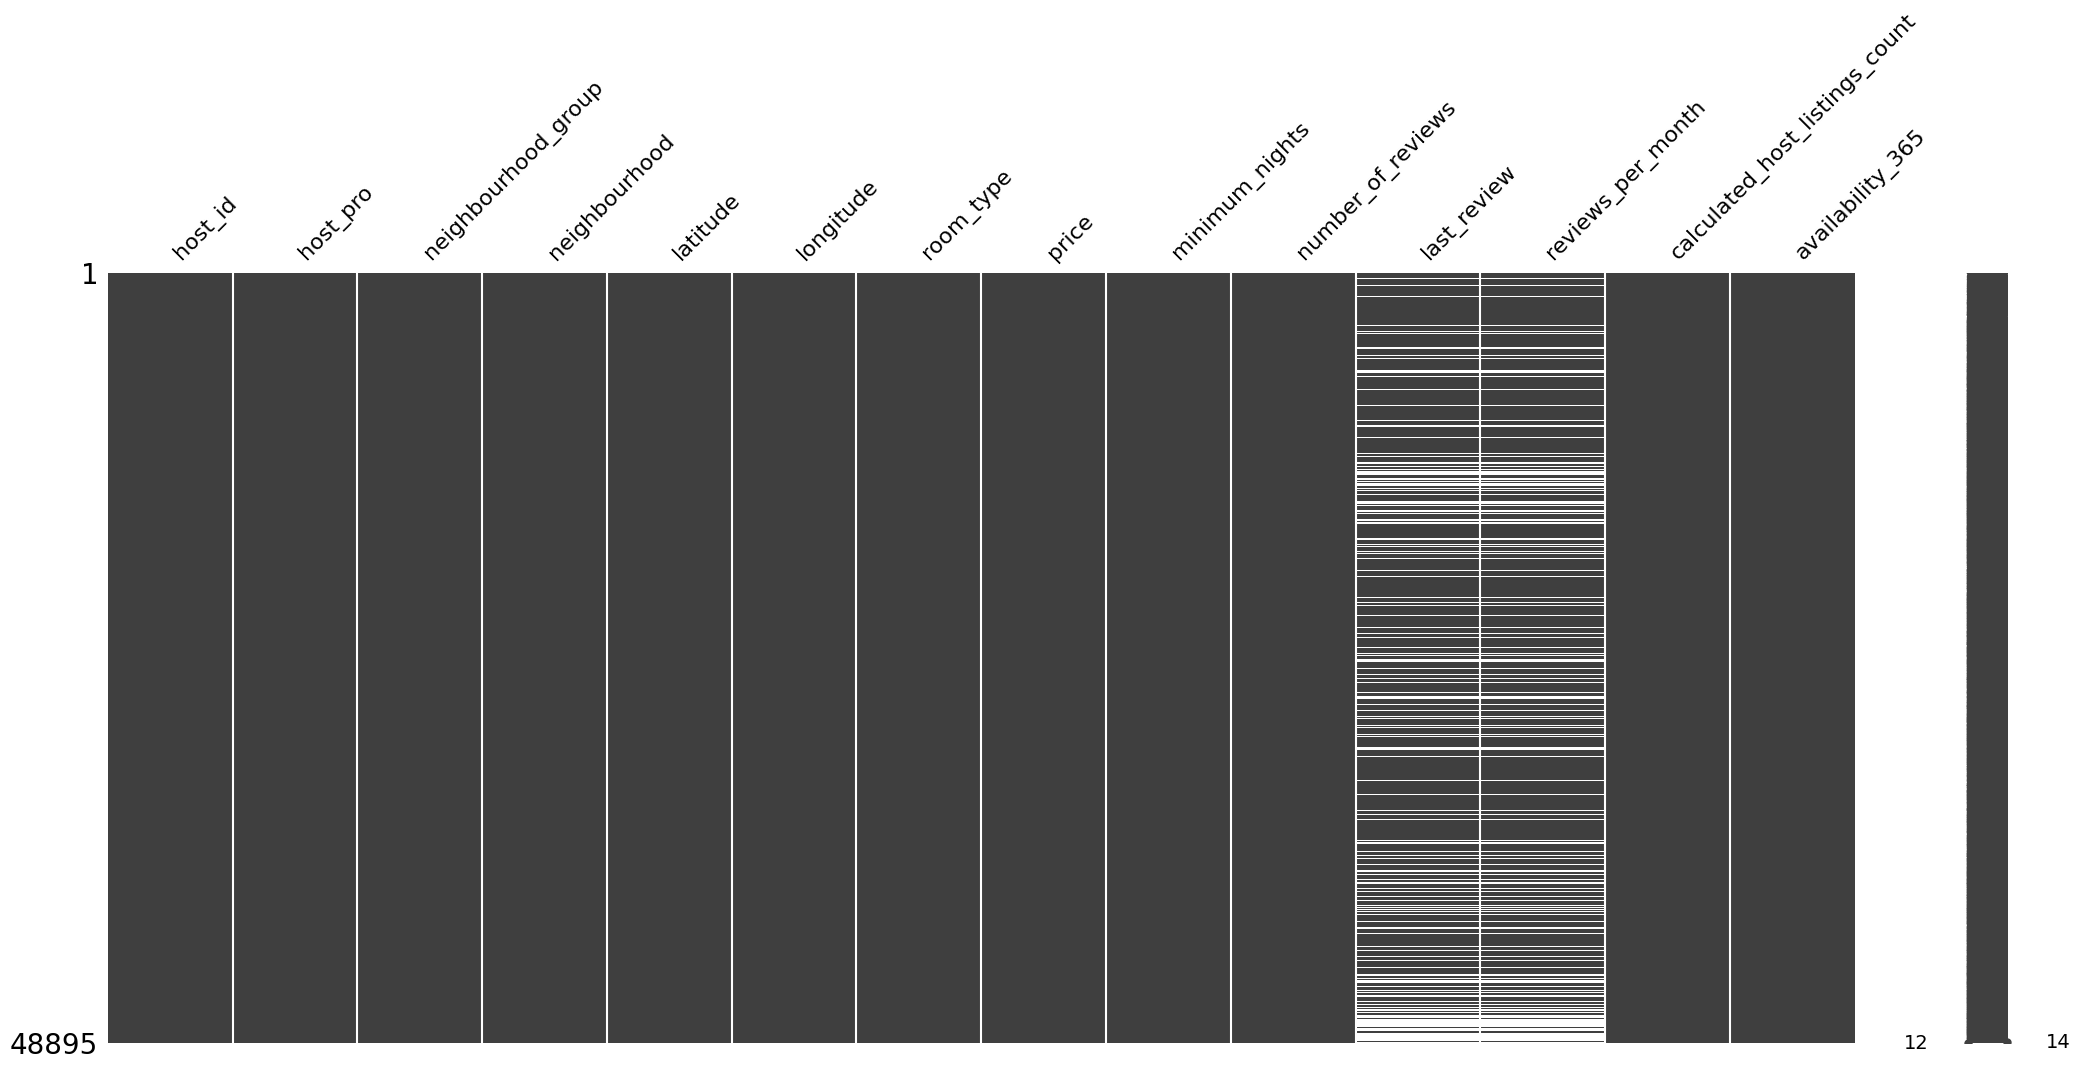

In [144]:
# VISUALIZACION DE DATOS FALTANTES CON MISSINGNO EN FORMA DE MATRIZ
msno.matrix(df)

NORMALIZAR CADA COLUMNA 

MÉTODOS PARA CAMBIAR COLUMNAS O VARIABLES DE TEXTO A NUMEROS (CATEGORIZAR)

In [145]:
# ESTUDIAMOS LA COLUMNA neighbourhood_group
print(df['neighbourhood_group'].unique())
print(df['neighbourhood_group'].nunique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
5


In [146]:
# CALCULAMOS LA MEDIA PARA ORGANIZAR LAS VALORES DE ESTA COLUMNA DE MAYOR A MENOR
indicador = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=True)
print(indicador)

neighbourhood_group
Bronx             87.496792
Queens            99.517649
Staten Island    114.812332
Brooklyn         124.383207
Manhattan        196.875814
Name: price, dtype: float64


In [147]:
#Creamos un df ordenando los barrios por su precio medio
indicador=df.groupby("neighbourhood_group")["price"].mean().sort_values().reset_index()#Pasamos la serie a df
#Creamos un ranking de menor a mayor precio
indicador["cat"]=indicador["price"].rank().astype(int)
#Eliminamos el precio del df y establecemos indice para crear el diccionario objetivo
mapping=indicador.drop(columns=["price"]).set_index("neighbourhood_group").to_dict()["cat"]
mapping

{'Bronx': 1, 'Queens': 2, 'Staten Island': 3, 'Brooklyn': 4, 'Manhattan': 5}

In [148]:
# 1. limpiar textos
df['neighbourhood_group'] = df['neighbourhood_group'].astype(str).str.strip()

# 2. crear nueva columna mapeada (destruye la original)
df['neighbourhood_group'] = df['neighbourhood_group'].replace(mapping)

# mostrar las primeras 30 filas para comprobar
df.head(10)


/tmp/ipykernel_20776/1800774966.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['neighbourhood_group'] = df['neighbourhood_group'].replace(mapping)


,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
2539,2787,1,4,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,1,5,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,0,5,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,0,4,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,0,5,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,7322,0,5,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5121,7356,0,4,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
5178,8967,0,5,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
5203,7490,0,5,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


In [149]:
# ESTUDIAMOS LA COLUMNA neighbourhood 
print(df['neighbourhood'].unique())
print(df['neighbourhood'].nunique())

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [150]:
#CALCULAMOS LA MEDIA PARA ORRAGNAR LAS VALORES DE ESTA COLUMNA DE MAYOR A MENOR
indicador = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
print(indicador)

neighbourhood
Bull's Head        47.333333
Hunts Point        50.500000
Tremont            51.545455
Soundview          53.466667
New Dorp           57.000000
                     ...    
Riverdale         442.090909
Sea Gate          487.857143
Tribeca           490.638418
Woodrow           700.000000
Fort Wadsworth    800.000000
Name: price, Length: 221, dtype: float64


In [151]:
#Creamos un df ordenando lor barrios por su precio medio
indicador=df.groupby("neighbourhood")["price"].mean().sort_values().reset_index()#Pasamos la serie a df
#Creamos un ranking de menor a mayor precio
indicador["cat"]=indicador["price"].rank().astype(int)
#Eliminamos el precio del df y establecemos indice para crear el diccionario objetivo
mapping=indicador.drop(columns=["price"]).set_index("neighbourhood").to_dict()["cat"]
mapping

{"Bull's Head": 1,
 'Hunts Point': 2,
 'Tremont': 3,
 'Soundview': 4,
 'New Dorp': 5,
 'Bronxdale': 6,
 'New Dorp Beach': 7,
 'Grant City': 8,
 'Concord': 9,
 'Mount Eden': 10,
 'Corona': 11,
 'Woodlawn': 12,
 'Castle Hill': 13,
 'Borough Park': 14,
 'Olinville': 15,
 'Woodhaven': 16,
 'Arden Heights': 17,
 'Emerson Hill': 18,
 'Graniteville': 19,
 'Parkchester': 20,
 'Schuylerville': 21,
 'Morris Park': 22,
 'Fordham': 23,
 'University Heights': 24,
 'Silver Lake': 25,
 'Highbridge': 26,
 'Westerleigh': 27,
 'Concourse Village': 28,
 'Rossville': 29,
 'Fieldston': 30,
 'Little Neck': 31,
 'Baychester': 32,
 'Norwood': 33,
 'Bensonhurst': 34,
 'New Springville': 35,
 'Tompkinsville': 36,
 'Brownsville': 37,
 'Rosedale': 38,
 'Morris Heights': 39,
 'Belmont': 40,
 'Ridgewood': 41,
 'Co-op City': 42,
 'Mount Hope': 42,
 'Kingsbridge': 44,
 'Richmondtown': 45,
 'Gravesend': 46,
 'Dongan Hills': 47,
 'Port Morris': 48,
 'North Riverdale': 49,
 'Midwood': 50,
 'Elmhurst': 51,
 'West Brighto

In [152]:
# 1. limpiar textos
df['neighbourhood'] = df['neighbourhood'].astype(str).str.strip()

# 2. crear nueva columna mapeada (destruye la original)
df['neighbourhood'] = df['neighbourhood'].replace(mapping)

# mostrar las primeras 30 filas para comprobar
df.head(10)

/tmp/ipykernel_20776/4290575551.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['neighbourhood'] = df['neighbourhood'].replace(mapping)


,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
2539,2787,1,4,93,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,1,5,210,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,0,5,137,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,0,4,185,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,0,5,149,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,7322,0,5,199,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5121,7356,0,4,121,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
5178,8967,0,5,194,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
5203,7490,0,5,196,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


In [153]:
# ESTUDIAMOS LA COLUMNA ROOM TYPE
print(df['room_type'].unique())
print(df['room_type'].nunique())

['Private room' 'Entire home/apt' 'Shared room']
3


In [154]:
# # COLUMNA ROOM TYPE
indicador = df.groupby('room_type')['price'].mean().sort_values(ascending=True)
print(indicador)

room_type
Shared room         70.127586
Private room        89.780973
Entire home/apt    211.794246
Name: price, dtype: float64


In [155]:
#Creamos un df ordenando lor barrios por su precio medio
indicador=df.groupby("room_type")["price"].mean().sort_values().reset_index()#Pasamos la serie a df
#Creamos un ranking de menor a mayor precio
indicador["cat"]=indicador["price"].rank().astype(int)
#Eliminamos el precio del df y establecemos indice para crear el diccionario objetivo
mapping=indicador.drop(columns=["price"]).set_index("room_type").to_dict()["cat"]
mapping

{'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3}

In [156]:
# 1. limpiar textos
df['room_type'] = df['room_type'].astype(str).str.strip()

# 2. crear nueva columna mapeada (destruye la original)
df['room_type'] = df['room_type'].replace(mapping)

# mostrar las primeras 30 filas para comprobar
df.head(10)

/tmp/ipykernel_20776/3152201068.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['room_type'] = df['room_type'].replace(mapping)


,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
2539,2787,1,4,93,40.64749,-73.97237,2,149,1,9,2018-10-19,0.21,6,365
2595,2845,1,5,210,40.75362,-73.98377,3,225,1,45,2019-05-21,0.38,2,355
3647,4632,0,5,137,40.80902,-73.94190,2,150,3,0,NaN,NaN,1,365
3831,4869,0,4,185,40.68514,-73.95976,3,89,1,270,2019-07-05,4.64,1,194
5022,7192,0,5,149,40.79851,-73.94399,3,80,10,9,2018-11-19,0.10,1,0
5099,7322,0,5,199,40.74767,-73.97500,3,200,3,74,2019-06-22,0.59,1,129
5121,7356,0,4,121,40.68688,-73.95596,2,60,45,49,2017-10-05,0.40,1,0
5178,8967,0,5,194,40.76489,-73.98493,2,79,2,430,2019-06-24,3.47,1,220
5203,7490,0,5,196,40.80178,-73.96723,2,79,2,118,2017-07-21,0.99,1,0


In [157]:
# NORMALIZACIÓN SENCILLA de 'last_review' 
# - Convertir 'last_review' a datetime 
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce') # corrige el error NaT que es mejor para trabajar con fechas 
today = pd.to_datetime('2019-07-10')
# calcular días desde la última revisión
df['days_since_review'] = (today - df['last_review']).dt.days
df['days_since_review']


id
2539        264.0
2595         50.0
3647          NaN
3831          5.0
5022        233.0
            ...  
36484665      NaN
36485057      NaN
36485431      NaN
36485609      NaN
36487245      NaN
Name: days_since_review, Length: 48895, dtype: float64

In [158]:
# NORMALIZACIÓN SENCILLA de 'reviews_per_month' Y AÑADIR CERO A LAS FILAS CON NaN
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')
df['reviews_per_month'].fillna(0, inplace=True)

/tmp/ipykernel_20776/1072616232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [159]:
# AHORA PODEMOS ELIMINAR LA COLUMNA LAST_REVIEW YA QUE NOS INTERESA MÁS LA COLUMNA DAYS_SINCE_REVIEW Y VIZUALIZAMOS TAMBIEN EL DATAFRAME CON LA COLUMNA YA NORMALIZADA REVIEWS
df.drop(['last_review'], axis=1, inplace=True)
df.head()

,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_review
id,,,,,,,,,,,,,,
2539,2787,1,4,93,40.64749,-73.97237,2,149,1,9,0.21,6,365,264.0
2595,2845,1,5,210,40.75362,-73.98377,3,225,1,45,0.38,2,355,50.0
3647,4632,0,5,137,40.80902,-73.94190,2,150,3,0,0.00,1,365,NaN
3831,4869,0,4,185,40.68514,-73.95976,3,89,1,270,4.64,1,194,5.0
5022,7192,0,5,149,40.79851,-73.94399,3,80,10,9,0.10,1,0,233.0


In [160]:
# SEPARAMOS LA VARIABLE QUE QUEREMOS ANALIZAR DEL DATAFRAME
X = df.drop('price',axis=1)
Y = df['price']

In [165]:
# DIVIDIMOS EL DATAFRAME EN 2 CONJUNTOS UNO DE ENTRENAMIENTO Y UNO DE PRUEBA
X = df.drop('price',axis=1)
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

IMPUTAR: Imputar significa rellenar los datos que faltan en tu tabla con valores razonables en lugar de dejarlos vacíos.

In [166]:
# SOLO TENEMOS DATOS FALTANTES EN DAYS_SINCE_REVIEW
X_train[['days_since_review']]


,days_since_review
id,
25674366,55.0
19100971,380.0
24209867,NaN
22451798,5.0
5344850,204.0
...,...
8754339,NaN
34383329,10.0
30109697,89.0


In [167]:
X_train['days_since_review'].value_counts(normalize=True)*100

days_since_review
17.0      3.676233
9.0       3.579490
10.0      3.482748
16.0      2.292809
3.0       1.799420
            ...   
1727.0    0.003225
939.0     0.003225
1531.0    0.003225
1454.0    0.003225
1184.0    0.003225
Name: proportion, Length: 1688, dtype: float64

In [168]:
imputer = MissForest(categorical=['days_since_review'])
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

NameError: name 'MissForest' is not defined

In [105]:
# VER EL TOP 10 VALORES MÁS FRECUENTES REDONDEADOS
X_train['reviews_per_month'].value_counts(dropna=False, normalize=True).head(10).round(2)*100

reviews_per_month
0.00    21.0
0.02     2.0
1.00     2.0
0.05     2.0
0.03     2.0
0.16     1.0
0.04     1.0
0.06     1.0
0.09     1.0
0.08     1.0
Name: proportion, dtype: float64

In [104]:
# OUTLIERS
columns=["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "days_since_review", "availability_365"]
X_train[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,39116.0,4.141374,1.043551,1.00000,4.000000,4.000000,5.000000,5.00000
neighbourhood,39116.0,146.714669,49.178692,1.00000,121.000000,158.000000,190.000000,221.00000
latitude,39116.0,40.728927,0.054555,40.49979,40.690067,40.723035,40.763180,40.91306
longitude,39116.0,-73.952311,0.046029,-74.24285,-73.983080,-73.955750,-73.936498,-73.71299
room_type,39116.0,2.497520,0.544968,1.00000,2.000000,3.000000,3.000000,3.00000
minimum_nights,39116.0,7.144775,21.472973,1.00000,1.000000,3.000000,5.000000,1250.00000
number_of_reviews,39116.0,23.334978,44.499352,0.00000,1.000000,5.000000,24.000000,629.00000
reviews_per_month,39116.0,1.094376,1.604249,0.00000,0.040000,0.370000,1.590000,58.50000
calculated_host_listings_count,39116.0,7.188925,33.172629,1.00000,1.000000,1.000000,2.000000,327.00000
days_since_review,31010.0,277.330087,413.495354,2.00000,17.000000,51.000000,360.000000,2998.00000


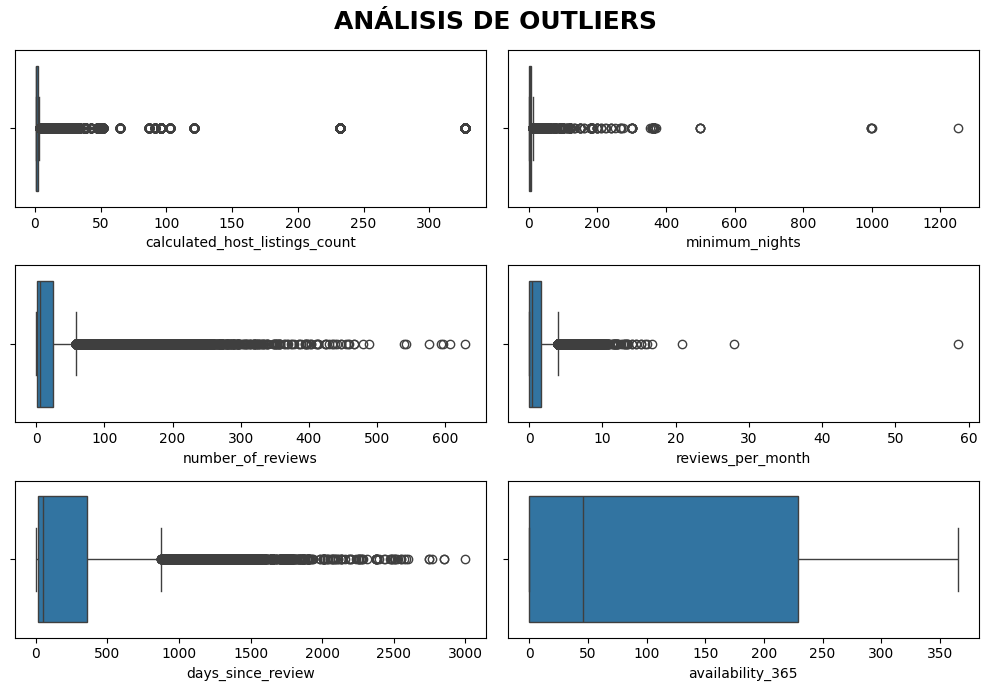

In [101]:
# GRAFICA DE LOS DATOS CON OUTLIERS
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.boxplot(ax = axis[0, 0], data = X_train, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[0, 1],data = X_train, x = "minimum_nights")
sns.boxplot(ax = axis[1, 0],data = X_train, x = "number_of_reviews")
sns.boxplot(ax = axis[1, 1],data = X_train, x = "reviews_per_month")
sns.boxplot(ax = axis[2, 0],data = X_train, x = "days_since_review")
sns.boxplot(ax = axis[2, 1],data = X_train, x = "availability_365")
fig.suptitle("Análisis de Outliers".upper(), size=18, fontweight="bold")
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()